# Tensorflow
### - Train your first neural netwok : Basic Classification

In [2]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\nch20\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [5]:
datasets = keras.datasets
fashion_mnist = datasets.fashion_mnist

keras 데이터셋 종류
 - keras.datasets.boston_housing
 - keras.datasets.cifar10
 - keras.datasets.cifar100
 - keras.datasets.fashion_mnist
 - keras.datasets.imdb
 - keras.datasets.mnist
 - keras.datasets.reuters

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 66s 15us/step


In [26]:
print(" - Train images type : " + str(type(train_images)) + " and size : " + str(len(train_images)))
print(" - Train labels type : " + str(type(train_labels)) + " and size : " + str(len(train_labels)))
print()

print(" - Test images type : " + str(type(test_images)) + " and size : " + str(len(test_images)))
print(" - Test labels type : " + str(type(test_labels)) + " and size : " + str(len(test_labels)))

 - Train images type : <class 'numpy.ndarray'> and size : 60000
 - Train labels type : <class 'numpy.ndarray'> and size : 60000

 - Test images type : <class 'numpy.ndarray'> and size : 10000
 - Test labels type : <class 'numpy.ndarray'> and size : 10000



##### 데이터셋에는 옷의 이름이 내장되어 있지 않기 때문에, 이미지를 분류한 후, 이미지와 이름을 매칭

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
train_images.shape

(60000, 28, 28)

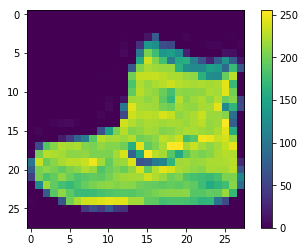

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [35]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [37]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

C:\Users\nch20\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


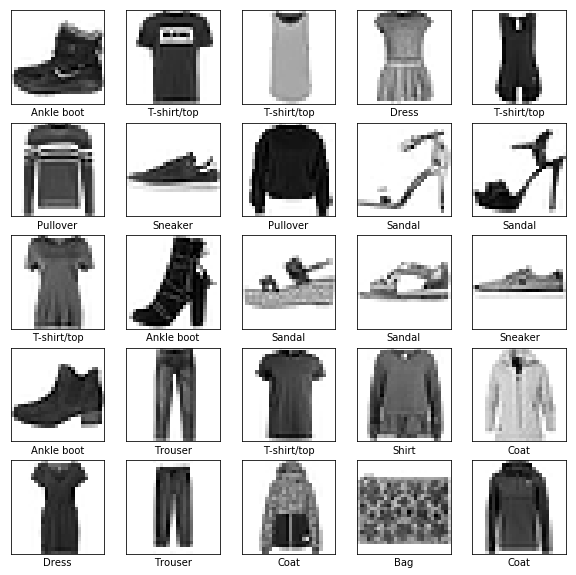

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [53]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4157 - acc: 0.8510
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4003 - acc: 0.8550
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3869 - acc: 0.8595
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3766 - acc: 0.8643
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3660 - acc: 0.8665
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3556 - acc: 0.8716
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3460 - acc: 0.8746
Epoch 8/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3386 - acc: 0.8771
Epoch 9/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3313 - acc: 0.8787
Epoch 10/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3243 - acc: 0.8809

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.7379


In [67]:
predictions = model.predict(test_images)

In [68]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [69]:
np.argmax(predictions[0])

9

In [70]:
test_labels[0]

9

C:\Users\nch20\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


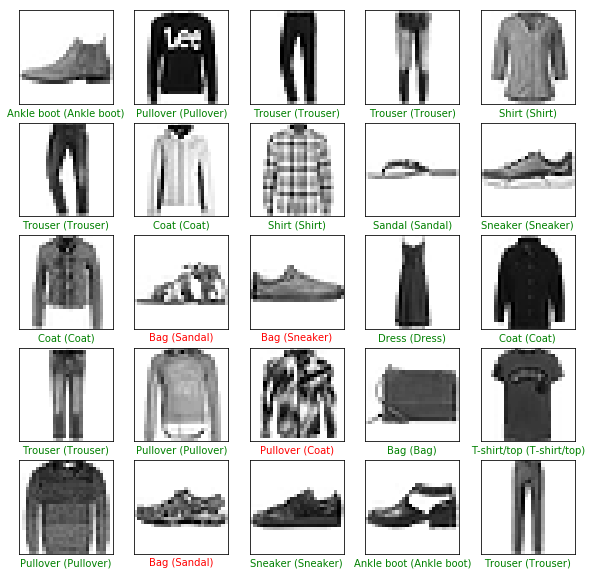

In [71]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

In [61]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [62]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [63]:
predictions = model.predict(img)

print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [64]:
prediction = predictions[0]

np.argmax(prediction)

9